# TASK 5 - SALES PREDICTION USING PYTHON

In [18]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df.shape

(200, 5)

In [21]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


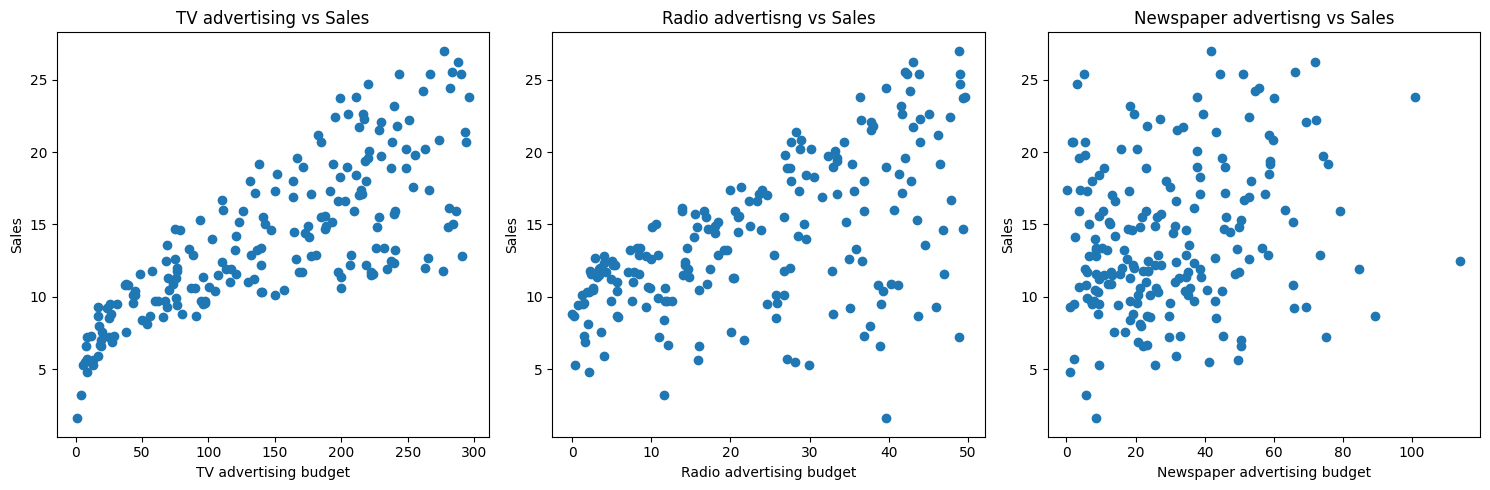

In [25]:
plt.figure(figsize=(15,5))

# Scatter plot for TV advertising budget vs. Sales
plt.subplot(131)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV advertising vs Sales')
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')

# Scatter plot for Radio advertising budget vs. Sales
plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio advertisng vs Sales')
plt.xlabel('Radio advertising budget')
plt.ylabel('Sales')

# Scatter plot for Newspaper advertising budget vs. Sales
plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper advertisng vs Sales')
plt.xlabel('Newspaper advertising budget')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

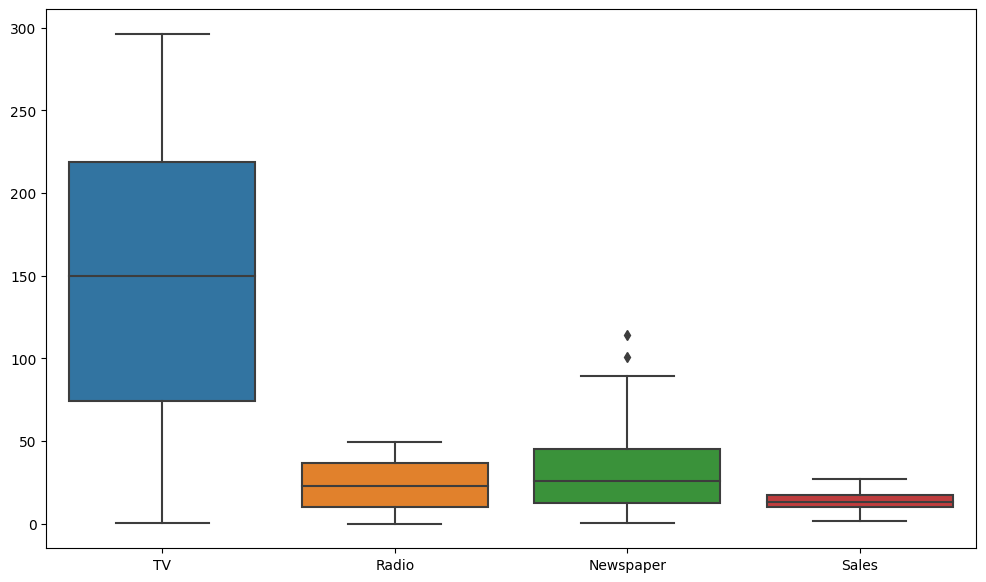

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

In [27]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
column_to_winsorize = 'Newspaper'
df[column_to_winsorize] = winsorize(df[column_to_winsorize], limits=(0.05, 0.05))

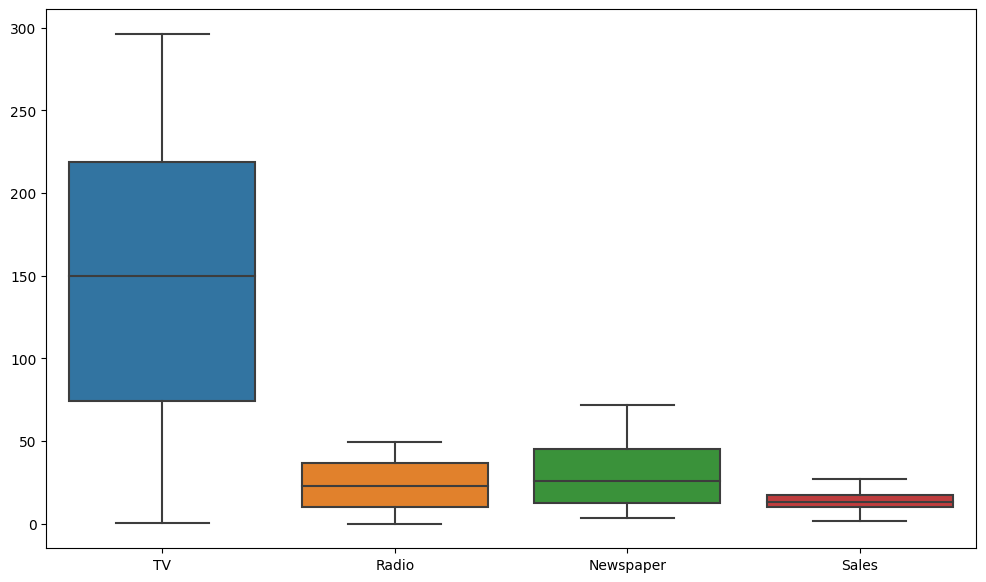

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

In [29]:

X = df.drop('Sales', axis=1)#INDEPENDENT VARIABLE
y = df['Sales']# DEPENDENT VARIABLE

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.955484,1.552053
1,-1.197376,1.082808,0.752217,-0.696046
2,-1.516155,1.528463,1.960477,-0.907406
3,0.052050,1.217855,1.421253,0.860330
4,0.394182,-0.841614,1.416261,-0.215683


#### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [33]:
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })

,Actual_y,Predicted_y
112,14.1,13.859802
165,11.9,14.963810
12,9.2,10.625771
73,11.0,10.097752
144,11.4,10.215087
20,18.0,18.459461
199,13.4,15.349957
8,4.8,3.508098
39,21.5,20.573664
88,12.9,12.001026


In [34]:

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)

R-squared: 0.8597470838087851
